In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import utils as ut

#TODO: 1.5 - ask for the right channel locations!
#TODO: 1.5 - Visualize better the networks
#TODO: 1.6 - Check if alternative frequency is meaningful
#TODO: ALL - Create a better visualization of the adjacency matrix
#TODO: utils - Comment all functions


# Read the files
eo = ut.read_file("../data/S072R01.edf")
ec = ut.read_file("../data/S072R01.edf")

######## 1.1

fs = 160 # Frequency of sampling, given by data
resolution = 50 # Resolution of model (s.t. each bin has 1Hz of width)
freq = 10 # Frequency of interest
density = 0.2 # Density of the graph desired


###PDC

# Fitting PDC models
eo_pdc = ut.fit_model(eo, fs, resolution, "pdc", freq)
ec_pdc = ut.fit_model(ec, fs, resolution, "pdc", freq)

# Adjacency Matrices for 20% density networks
ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,density), "eo_pdc_20")
ut.adjacency_matrix(ec_pdc, ut.find_threshold(ec_pdc,density), "ec_pdc_20")

In [17]:
import numpy as np
import os
import pyedflib
import connectivipy
import matplotlib.pyplot as plt
import networkx as nx

def adjacency_matrix(network, threshold, file=None):
    adj = (network > threshold).astype(int)
    if file:
        #Save the npy
        np.save("results/npy/"+file+".npy",adj)
        
        #Save the png
        
        plt.figure(figsize = (20,20))
        
        ############################ MODIFY HERE FOR THE VISUALIZATION
            
        plt.imshow(adj, cmap='Blues', interpolation='none')
        plt.xticks(range(64))
        plt.yticks(range(64))
       
        
        ############################
        plt.show()
        #plt.savefig("results/png/adj_matrices/"+file+".png")
        #plt.close()
        
        return
    #return adj


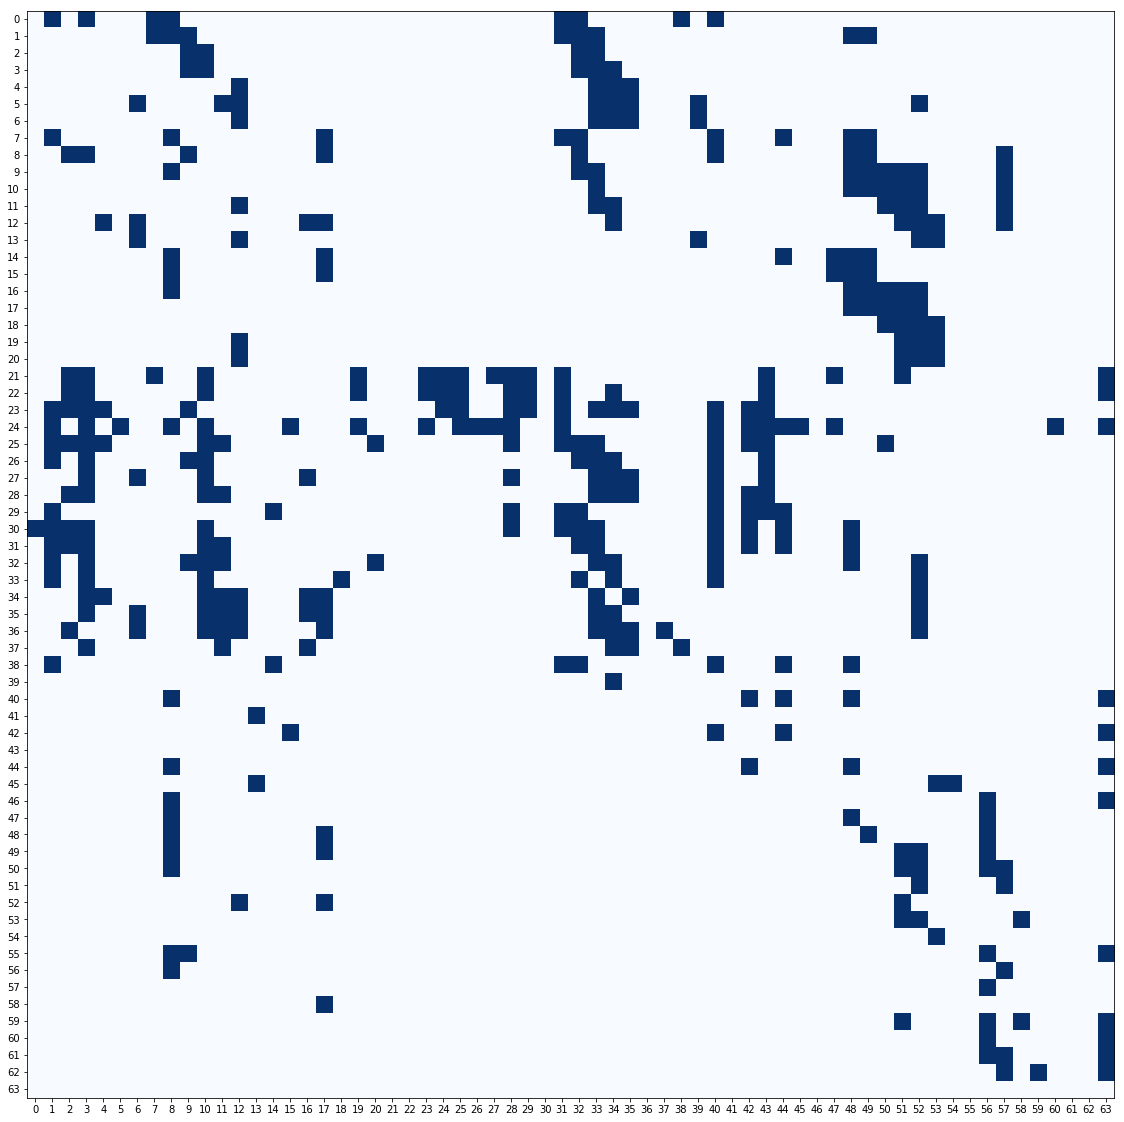

In [18]:
adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,density), "eo_pdc_20")

In [ ]:
######## 1.2


# Fitting DTF models
eo_dtf = ut.fit_model(eo, fs, resolution, "dtf", freq)
ec_dtf = ut.fit_model(ec, fs, resolution, "dtf", freq)

# Adjacency Matrices for 20% density networks
ut.adjacency_matrix(eo_dtf, ut.find_threshold(eo_dtf,density), "eo_dtf_20")
ut.adjacency_matrix(ec_dtf, ut.find_threshold(ec_dtf,density), "ec_dtf_20")




######## 1.3

densities = [0.01,0.05,0.1,0.3,0.5] #Different thresholds

#Names for files
eo_pdc_names = ["eo_pdc_01", "eo_pdc_05", "eo_pdc_10", "eo_pdc_30", "eo_pdc_50"]
ec_pdc_names = ["ec_pdc_01", "ec_pdc_05", "ec_pdc_10", "ec_pdc_30", "ec_pdc_50"]
eo_dtf_names = ["eo_dtf_01", "eo_dtf_05", "eo_dtf_10", "eo_dtf_30", "eo_dtf_50"]
ec_dtf_names = ["ec_dtf_01", "ec_dtf_05", "ec_dtf_10", "ec_dtf_30", "ec_dtf_50"]


### PDC Networks

eo_pdc_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,x[0]), x[1]), zip(densities,eo_pdc_names)))
eo_pdc_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,x[0]), x[1]), zip(densities,ec_pdc_names)))


### DTF Networks

eo_dtf_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_dtf,x[0]), x[1]), zip(densities,eo_dtf_names)))
eo_dtf_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_dtf,x[0]), x[1]), zip(densities,ec_dtf_names)))





######## 1.4

#Subset of channels
channels = ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T7", "C3", "Cz", "C4", "T8", "P7", "P3", "Pz", "P4", "P8", "O1", "O2"]

# Reading the subset of channels from files
small_eo = ut.read_file("../data/S072R01.edf", channels = channels)
small_ec = ut.read_file("../data/S072R02.edf", channels = channels)

# Adjacency Matrices with Bootstrap validation
ut.adjacency_matrix(ut.fit_model(small_eo, fs, resolution, "pdc", freq = freq, boot = True), 0.05, "small_eo_pdc")
ut.adjacency_matrix(ut.fit_model(small_ec, fs, resolution, "pdc", freq = freq, boot = True), 0.05, "small_ec_pdc")


######## 1.5

# Save a png of the network for each network
for network in [elem[:-4] for elem in ut.get_networks()]:
    ut.viz_graph(network)


######## 1.6

# Choosing an alternative frequency
alternative_frequency = 20

###PDC

# Fitting models
alt_eo_pdc = ut.fit_model(eo, fs, resolution, "pdc", alternative_frequency)
alt_ec_pdc = ut.fit_model(ec, fs, resolution, "pdc", alternative_frequency)

# Adjacency Matrices
ut.adjacency_matrix(eo_pdc, ut.find_threshold(alt_eo_pdc,density), "alt_eo_pdc_20")
ut.adjacency_matrix(ec_pdc, ut.find_threshold(alt_ec_pdc,density), "alt_ec_pdc_20")

In [ ]:
def adjacency_matrix(network, threshold, file=None):
    adj = (network > threshold).astype(int)
    if file:
        #Save the npy
        np.save("results/npy/"+file+".npy",adj)
        
        #Save the png
        
        plt.figure(figsize = (20,20))
        
        ############################ MODIFY HERE FOR THE VISUALIZATION
            
        plt.imshow(adj, cmap='Blues', interpolation='none')
       
        
        ############################
        
        plt.savefig("results/png/adj_matrices/"+file+".png")
        plt.close()
        
        return
    return adj